<a href="https://colab.research.google.com/github/lbznancio/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb: Toronto, Canadá

Em plena virada para 2023, está cada vez mais difícil encontrar alguém que nunca tenha ouvido falar do [Airbnb](https://www.airbnb.com.br/). Afinal, trata-se da **maior plataforma de hospedagem da atualidade**, com mais de 150 milhões de usuários espalhados pelo globo e cerca de 1 bilhão de hóspedes em quase todos os países.

O mais interessante é que os dados de algumas das principais cidades do mundo são disponibilizados no próprio *site* da empresa. Assim, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções com *Data Science*.

Neste *notebook*, realizaremos uma análise exploratória dos dados referentes à cidade de **Toronto**, Canadá, e veremos quais *insights* podem ser a partir dela.

<p align=center>
  <img src="https://dynamic-media-cdn.tripadvisor.com/media/photo-o/14/10/2f/e4/toronto.jpg?w=1200&h=-1&s=1" height="400px">
</p>

Antes, algumas curiosidades e informações rápidas sobre Toronto: 

1. O nome de Toronto provavelmente é derivado da palavra iroquesa ***tkaronto***, que significa "*lugar onde as árvores estão na água*";

2. Com uma populção de quase 3 milhões de habitantes, ela é a maior cidade do Canadá, além de ser a capital da província canadense de Ontário;

3. Considerada o maior centro financeiro do país, Toronto também é sede dos cinco maiores bancos do Canadá e de grandes corporações canadenses e multinacionais;

4.  Graças à sua rica variedade de atrações (museus, galerias, locais históricos nacionais, etc.), ela recebe mais de **25 milhões** de turistas anualmente! 

Para essas e outras informações, clique [aqui](https://pt.wikipedia.org/wiki/Toronto#).



## Obtenção dos Dados

Todos os dados usados aqui foram obtidos do portal *Inside Airbnb* já citado. No caso, o arquivo baixado foi o `listings.csv` - *summary information and metrics for listings in Toronto (good for visualisations)*.

In [1]:
# importando os pacotes necessários
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

warnings.filterwarnings('ignore')
sns.set_style()
%matplotlib inline


In [2]:
# importando o arquivo para um DataFrame
df = pd.read_csv('listings.csv')

## Análise dos Dados
O objetivo principal desta etapa é obter um entendimento geral de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - identificador do imóvel;
* `name` - nome do imóvel anunciado;
* `host_id` - identificador do proprietário (anfitrião) do imóvel;
* `host_name` - nome do anfitrião;
* `neighbourhood_group` - esta coluna não contém nenhum valor válido;
* `neighbourhood` - nome do bairro que o imóvel se encontra;
* `latitude` - coordenada da latitude do imóvel;
* `longitude` - coordenada da longitude do imóvel;
* `room_type` - informa o tipo de quarto que é oferecido (se é o espaço inteiro, quarto privado ou compartilhado);
* `price` - preço para alugar o imóvel;
* `minimum_nights` - quantidade mínima de noites para reservar o imóvel;
* `number_of_reviews` - número de *reviews* que o imóvel possui;
* `last_review` - data do último *review*;
* `reviews_per_month` - quantidade de *reviews* por mês;
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade do imóvel no período de um ano;
* `number_of_reviews_ltm`- número de *reviews* nos últimos 12 meses;
* `license`- o número de licença/autorização/registro do imóvel.



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Começaremos com uma visualização simples e estatística dos dados, atentando-nos ao volume de dados e às categorias de cada variável.

In [3]:
# identificando o volume de dados do DataFrame
print("Este dataset possui:",
    "\nVariáveis (colunas): ",df.shape[1], "\n"
      "Entradas (linhas): ", df.shape[0], "\n")

Este dataset possui: 
Variáveis (colunas):  18 
Entradas (linhas):  16035 



In [4]:
# visualizando as cinco primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27640141,Fibre internet*Monthly Discount*Character House,2343887,Liora,NaN,Dovercourt-Wallace Emerson-Junction,43.66434,-79.42496,Entire home/apt,90,28,47,2022-06-13,0.95,2,145,4,NaN
1,27647117,Cozy studio in an amazing neighbourhood!,96809956,Alexandra,NaN,Playter Estates-Danforth,43.67943,-79.34853,Entire home/apt,45,28,4,2021-02-06,0.08,1,0,0,NaN
2,27826009,Downtown condo,17410774,Brianne,NaN,Waterfront Communities-The Island,43.64698,-79.39121,Entire home/apt,130,28,2,2018-09-09,0.04,1,0,0,NaN
3,27647509,Dundas west subway station apartment BEST LOCA...,179249078,Rosana,NaN,High Park North,43.65953,-79.45416,Private room,80,28,9,2019-03-20,0.19,1,0,0,NaN
4,27653375,Exquisite 1200 sqft 3BR + Den in core-downtown,135718015,Ayk,NaN,Waterfront Communities-The Island,43.64126,-79.38277,Entire home/apt,1999,28,20,2021-06-24,0.42,37,179,0,STR-2204-HLPVHK


In [5]:
# verificando os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Definir os tipos de dados corretamente pode nos ajudar em certos tipos de processos dentro da ciência de dados. Em nosso caso, como a maior parte dos tipos de dados já está adequada, apenas alteraremos as colunas `id` e `host_id` para o tipo *string*.

***Nota***: a coluna `last_review` poderia ter o seu tipo alterado para *datetime*, porém, mais adiante, iremos removê-la do nosso *dataframe*, portanto podemos deixá-la como está.







In [6]:
# alterando os identificadores "id" e "host_id" para string
df[['id', 'host_id']] = df[['id', 'host_id']].astype('str')


### **Q2. Qual a porcentagem de valores ausentes no *dataset*? Há valores duplicados?**
Esse é um questionamento importante, pois a qualidade de um *dataset* está intimamente ligada à quantidade de valores ausentes e valores duplicados. Assim sendo, buscar verificar se há valores nulos ou duplicados e, em caso positivo, se são significativos em comparação ao total de entradas, é um passo essencial para nossa análise.

In [7]:
# mostrando a quantidade de dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               16035
license                            9547
reviews_per_month                  3395
last_review                        3395
host_name                             2
name                                  2
number_of_reviews                     0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

In [8]:
# em termos de porcentagem
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            59.538510
reviews_per_month                  21.172435
last_review                        21.172435
host_name                           0.012473
name                                0.012473
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

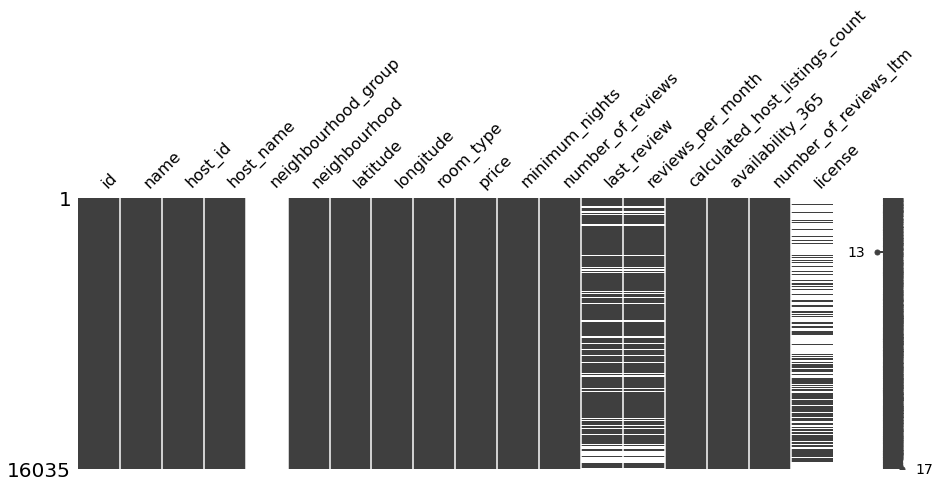

In [9]:
# visualizando esses valores graficamente
if df.isnull().any(axis=None):
    missingno.matrix(df, figsize=(15,5))
    plt.show()

Ou seja: 


*  `host_name` e `name`têm a mesma porcentagem de valores nulos: 0,1%.
*  `neighbourhood_group` possui valores ausentes em *todas* as suas entradas;
*  `last_review` e  `reviews_per_month` possuem valores nulos em, aproximadamente, 20% das suas linhas;
* Por fim, `license` está com valores faltantes em mais da metade das suas entradas.  







In [10]:
# verificando se há entradas duplicadas
if len(df[df.duplicated()]) > 0:
    print("Número de entradas duplicadas: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("Nenhuma entrada duplicada encontrada.")

Nenhuma entrada duplicada encontrada.


Aqui, é importante dizer que, no caso do Airbnb, é muito comum que certos anfitriões valham-se de um único imóvel para gerar diferentes aluguéis a partir dos quartos deste. Portanto, é de se esperar, por exemplo, que haja nomes de proprietários ou nomes de endereços iguais num *dataset* qualquer desse tipo.

#### **Tratando dos valores ausentes**
Bom, como há somente valores ausentes em nosso *dataset*, eliminaremos primeiramente as variáveis `neighbourhood_group`, `last_review` e `license`, visto que todas elas não apresentam informações relevantes (ou nenhuma informação, como é o caso da primeira) aos nossos fins. 

Em seguida, preencheremos os valores ausentes da `reviews_per_month` com a mediana dos seus próprios valores. 

Por fim, quanto às colunas `host_name` e `name`, uma vez que os dados ausentes nelas estão em pequeno número, iremos deixá-las como estão, pois a inexistência do nome da propriedade e do anfitrião não impactará em nada a nossa análise.  

In [11]:
# eliminando as variáveis "neighbourhood_group", "last_review" e "license"
df.drop(columns=['neighbourhood_group','last_review', 'license'], inplace=True)

In [12]:
# preenchendo "reviews_per_month" com a sua mediana
rpm_med = df.reviews_per_month.median()
df = df.fillna({'reviews_per_month':rpm_med})

In [13]:
# conferindo as alterações
(df.isnull().sum()).sort_values(ascending=False)

name                              2
host_name                         2
id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para verificarmos como as variáveis do *dataset* estão distribuídas, um método prático é usar histogramas.

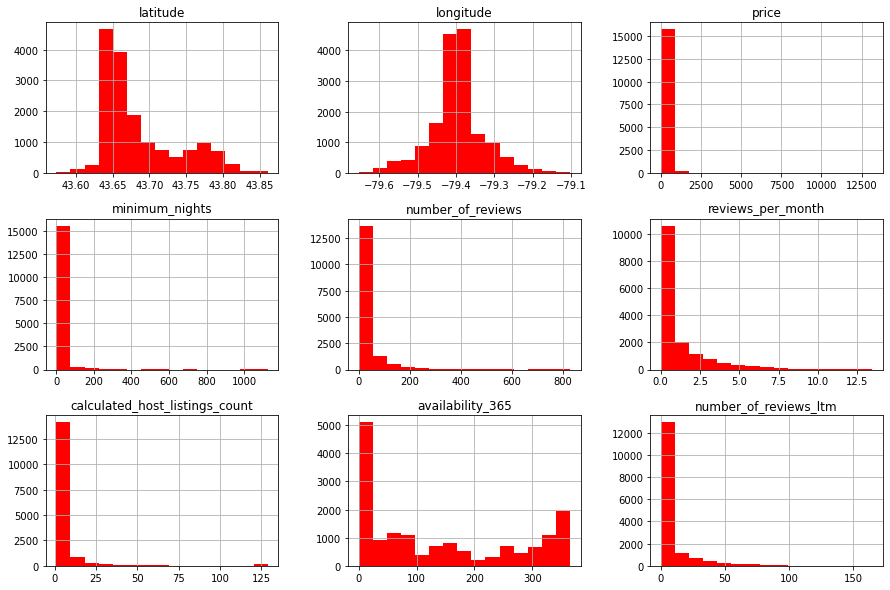

In [14]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color='r');

#### **Identificando** ***outliers***  

Pela distribuição dos histogramas acima, é possível suspeitar da presença de *outliers*. Para termos uma certeza maior disso, analisaremos o resumo estatístico das variáveis numéricas por meio do método `describe()`.

***Nota:*** usar *boxplots* também seria uma opção interessante para identificar *outliers* nas variáveis de interesse.

In [15]:
# resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16035.00,16035.00,16035.00,16035.00,16035.00,16035.00
mean,205.23,25.20,27.80,1.28,5.45,139.11
std,349.27,37.17,55.84,1.72,13.89,134.30
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,80.00,3.00,1.00,0.28,1.00,0.00
50%,130.00,28.00,6.00,0.67,1.00,90.00
75%,226.00,28.00,28.00,1.41,4.00,276.00
max,13164.00,1125.00,828.00,13.47,129.00,365.00


A partir do *output* acima, as colunas `price` e `minimum_nights` chamam à atenção nos seguintes pontos: 

* Começando por `price`, repare que 75% dos seus valores estão abaixo de 226 dólares canadenses, enquanto que o seu valor máximo ultrapassa a casa dos 10000! 

* Já no caso de `minimum_nights`, note que o seu valor máximo (= 1125.0) está bem acima dos 365 dias no ano. 

Essas são evidências de valores discrepantes. Portanto, está confirmado: temos grandes *outliers* nessas duas variáveis!

Bom, e se aplicarmos o mesmo raciocíonio às demais, facilmente concluiremos que elas também carregam seus valores discrepantes. Mas fiquemos somente com as duas primeiras colunas por ora. 


#### **Eliminado os outliers** 

Agora que já identificamos os *outliers* nas variáveis `price` e `minimum_nights`, vamos removê-los do nosso *dataset* e plotar novamente os histogramas + comparar os *boxplots* dos dados ***antes*** da limpeza com os *boxplots* dos dados ***depois*** da limpeza para cada uma delas. 

Lembre-se de que a limpeza de um *outlier* envolve encontrar os limites acima do terceiro quartil (Q3) e abaixo do primeiro quartil (Q1) a partir do **intervalo interquartil** (IQR).

##### **Removendo os outliers da variável** ***price*** 

In [16]:
# calculando o IQR de "price": 
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)

IQR_price = q3_price - q1_price

# definindo o limites superior e inferior, respectivamente: 
sup_price = q3_price + 1.5*IQR_price 
inf_price = q1_price - 1.5*IQR_price

print("O limite superior de price é:", sup_price)
print("O limite inferior de price é:", inf_price)

O limite superior de price é: 445.0
O limite inferior de price é: -139.0


Repare que, nesse caso, `price` não possui valores abaixo do limite inferior, até porque não existe preços abaixo de zero (seria ilógico). Temos, então, de eliminar apenas os valores que estão acima do limite superior, bem como os iguais a zero. 

In [17]:
# limpando os outliers de "price" do dataset
df_clean = df.copy()

# removendo os valores acima do limite superior
df_clean.drop(df_clean[df_clean.price > 445].index, axis=0, inplace=True)

# removendo os valores iguais a zero
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)


print("Número de entradas (antes da limpeza) para a coluna price:", df.price.shape[0])
print("Número de entradas (depois da limpeza) para a coluna price:", df_clean.price.shape[0])
print("Totalizando", df.price.shape[0] -  df_clean.price.shape[0], "outliers removidos!")

Número de entradas (antes da limpeza) para a coluna price: 16035
Número de entradas (depois da limpeza) para a coluna price: 14708
Totalizando 1327 outliers removidos!


###### **Comparando o antes e o depois (histogramas)**

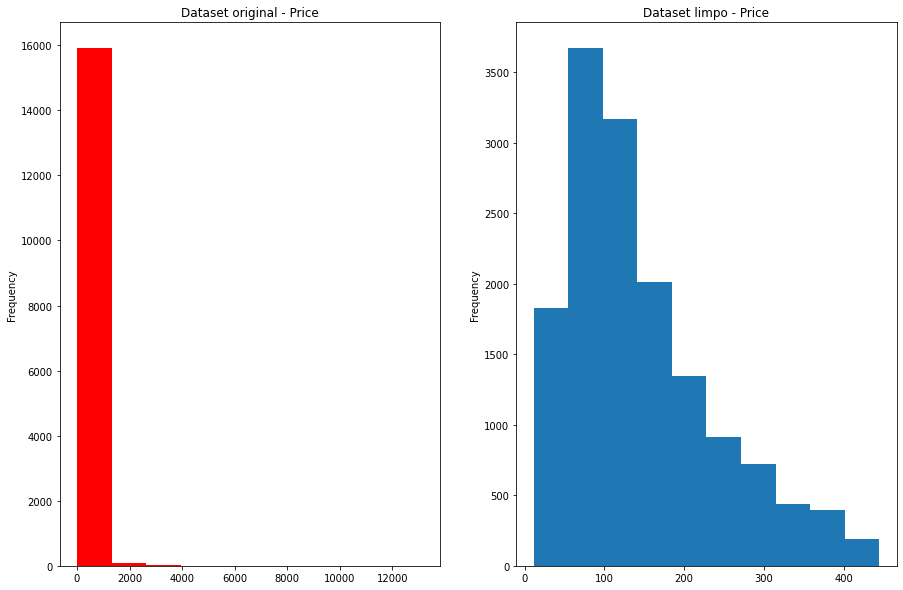

In [18]:
# comparando os histogramas de "price" antes e depois da limpeza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))


df.price.plot(kind='hist', ax=ax1, bins=10, color='r');
ax1.set_title('Dataset original - Price');  

df_clean.price.plot(kind='hist', ax=ax2);
ax2.set_title('Dataset limpo - Price');

###### **Comparando o antes e o depois (boxplots)**

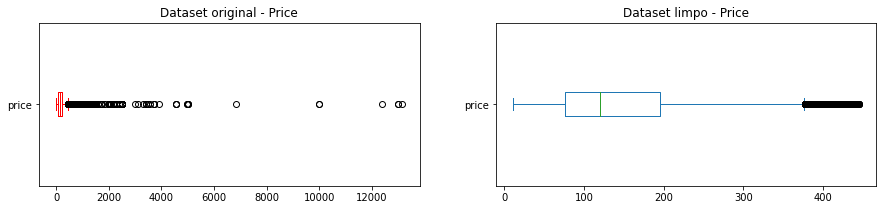

In [19]:
# comparando os boxplots de "price" antes e depois da limpeza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))


df.price.plot(kind='box', ax=ax1, color='r', vert=False);
ax1.set_title('Dataset original - Price');  

df_clean.price.plot(kind='box', ax=ax2, vert=False);
ax2.set_title('Dataset limpo - Price');

##### **Removendo os outliers da variável** ***minimum_nights*** 

Agora é só repetir o processo anterior...

In [20]:
# calculando o IQR de "minimum_nights": 
q1_mn = df.minimum_nights.quantile(.25)
q3_mn = df.minimum_nights.quantile(.75)

IQR_mn = q3_mn - q1_mn

# definindo o limites superior e inferior, respectivamente
sup_mn = q3_mn + 1.5*IQR_mn
inf_mn = q1_mn - 1.5*IQR_mn

print("O limite superior de minimum_nights é:", sup_mn)
print("O limite inferior de minimum_nights é:", inf_mn)

O limite superior de minimum_nights é: 65.5
O limite inferior de minimum_nights é: -34.5


Como já se percebe, tal como em `price`, devemos nos preocupar apenas com os valores de `minimum_nights` que estão acima do limite superior.

In [21]:
# limpando os outliers de "minimum_nights" do dataset
df_clean.drop(df_clean[df_clean.minimum_nights > 65.5].index, axis=0, inplace=True)

print("Número de entradas (antes da limpeza) para a minimum_nights:", df.minimum_nights.shape[0])
print("Número de entradas (depois da limpeza) para a minimum_nights:", df_clean.minimum_nights.shape[0])
print("Totalizando", df.minimum_nights.shape[0] -  df_clean.minimum_nights.shape[0], "outliers removidos!")

Número de entradas (antes da limpeza) para a minimum_nights: 16035
Número de entradas (depois da limpeza) para a minimum_nights: 14219
Totalizando 1816 outliers removidos!


###### **Comparando o antes e o depois (histogramas)**

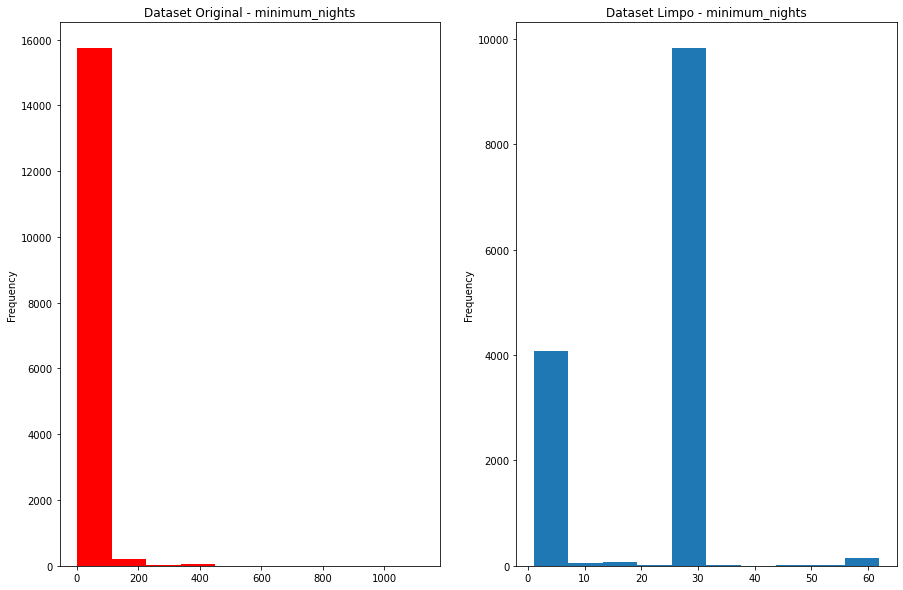

In [22]:
# comparando os histogramas de "minimum_nights" antes e depois da limpeza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

df.minimum_nights.plot(kind='hist', ax=ax1, color='r' );
ax1.set_title('Dataset Original - minimum_nights');

df_clean.minimum_nights.plot(kind='hist', ax=ax2);
ax2.set_title('Dataset Limpo - minimum_nights');

###### **Comparando o antes e o depois (boxplots)**

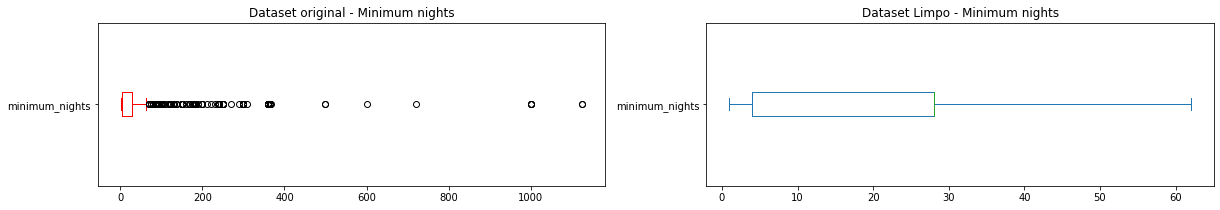

In [23]:
# comparando os boxplots de "minimum_nights" antes e depois da limpeza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))


df.minimum_nights.plot(kind='box', ax=ax1, color='r', vert=False);
ax1.set_title('Dataset original - Minimum nights');  


df_clean.minimum_nights.plot(kind='box', ax=ax2, vert=False);
ax2.set_title('Dataset Limpo - Minimum nights');

### **Q4. Qual a correlação existente entre as variáveis?**
Correlação significa associação. Trata-se de entender como uma variável se comporta em um cenário no qual outra está variando, isto é, se há alguma relação entre elas. Esta relação, por sua vez, pode ser mensurada, e o coeficiente de correlação estabelece a sua intensidade. 

Nesse sentido, para identificarmos as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [24]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr() 

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.225906,0.043245,0.211072,0.127900,0.103235
minimum_nights,-0.225906,1.000000,-0.222909,-0.520488,0.084149,-0.102462
number_of_reviews,0.043245,-0.222909,1.000000,0.472829,-0.073238,-0.023955
reviews_per_month,0.211072,-0.520488,0.472829,1.000000,-0.061458,0.091166
calculated_host_listings_count,0.127900,0.084149,-0.073238,-0.061458,1.000000,0.061233
availability_365,0.103235,-0.102462,-0.023955,0.091166,0.061233,1.000000


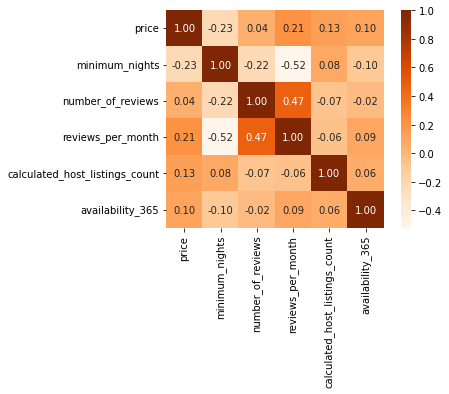

In [25]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Oranges', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual a média dos preços de aluguel?**

In [26]:
# média da coluna "price"
media_price = df_clean.price.mean()

print(f'A média dos preços é de {media_price:.2f} dólares canadenses.', end='')
print(f' Isto equivale a, aproximadamente, R$ {(media_price*3.79446).round(2)} em 28/12/22.')

A média dos preços é de 146.56 dólares canadenses. Isto equivale a, aproximadamente, R$ 556.13 em 28/12/22.


### **Q6. Qual é a média de noites mínimas para aluguel?**

In [27]:
# buscando a média da coluna "minimum_nights"
print("Média noites mínimas para aluguel:", df_clean.minimum_nights.mean().round(1))

# média de noites mínimas por bairros
mnoites_bairro = df_clean.groupby('neighbourhood').minimum_nights.mean().round(0)

print("\nMédia de noites mínimas por bairro:")
mnoites_bairro.sort_values(ascending=False)

Média noites mínimas para aluguel: 21.0

Média de noites mínimas por bairro:


neighbourhood
Kingsway South                       30.0
Bridle Path-Sunnybrook-York Mills    26.0
Humewood-Cedarvale                   26.0
Little Portugal                      25.0
Rosedale-Moore Park                  25.0
                                     ... 
Steeles                              12.0
Milliken                             11.0
Guildwood                            11.0
Rouge                                 9.0
Beechborough-Greenbrook               8.0
Name: minimum_nights, Length: 140, dtype: float64

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [28]:
# buscando quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9321
Private room       4750
Shared room         145
Hotel room            3
Name: room_type, dtype: int64

In [29]:
# colocando o output acima em termos de porcentagem
(df_clean.room_type.value_counts()*100)/ df_clean.shape[0]

Entire home/apt    65.553133
Private room       33.406006
Shared room         1.019762
Hotel room          0.021099
Name: room_type, dtype: float64

### **Q8. Quais as localidades mais cara do dataset?**



In [30]:
# Os dez bairros com as maiores médias de preço
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Waterfront Communities-The Island      219.339201
Bridle Path-Sunnybrook-York Mills      200.625000
Bay Street Corridor                    190.796512
Niagara                                187.790000
Beechborough-Greenbrook                178.571429
Casa Loma                              168.150943
Moss Park                              166.255014
Mimico (includes Humber Bay Shores)    165.679775
Annex                                  165.147268
Centennial Scarborough                 161.933333
Name: price, dtype: float64

Nesse momento, **não** podemos ir com sede ao pote e afirmar que, a partir do *output* acima, essas são as localidades mais caras do nosso *dataset*. *Por quê?* Ora, simplesmente porque o número de imóveis por bairro influencia no resultado. 

Veja, por exemplo, a diferença entre o número imóveis de *Bridle Path* para *Bay Street Corridor*:

In [31]:
# diferença de número de imóveis entre "Bridle Path-Sunnybrook" para "Bay Street Corridor" 
print("Nº de imóveis em Bridle Path - Sunnybrook =", 
      df_clean[df_clean.neighbourhood == "Bridle Path-Sunnybrook-York Mills"].shape[0])
print("Nº de imóveis em Bay Street Corridor =", 
      df_clean[df_clean.neighbourhood == "Bay Street Corridor"].shape[0])


Nº de imóveis em Bridle Path - Sunnybrook = 8
Nº de imóveis em Bay Street Corridor = 344


Logo, se quisermos um resultado mais preciso, devemos tomar como referência uma valor insensível aos extremos: a *mediana*.  

In [32]:
# encontrando a mediana de imóveis dos bairros
mediana_imov_bairro = df_clean.neighbourhood.value_counts().median()

print("A mediana da quantidade de imóveis por bairro é:", mediana_imov_bairro, "\n")

# mostrando os 3 bairros mais caros
novo_df = pd.concat([df_clean.neighbourhood.value_counts().rename('Número de imóveis'),
           df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).rename('Média de preço')],
            axis = 1).sort_values(by='Média de preço', ascending=False)

novo2_df = novo_df.loc[novo_df['Número de imóveis'] >= mediana_imov_bairro][:3]
print("Os três bairros mais caros são:")
novo2_df.sort_values(by=['Número de imóveis', 'Média de preço'], ascending=False).round(2)



A mediana da quantidade de imóveis por bairro é: 56.0 

Os três bairros mais caros são:


,Número de imóveis,Média de preço
Waterfront Communities-The Island,2102,219.34
Niagara,500,187.79
Bay Street Corridor,344,190.80


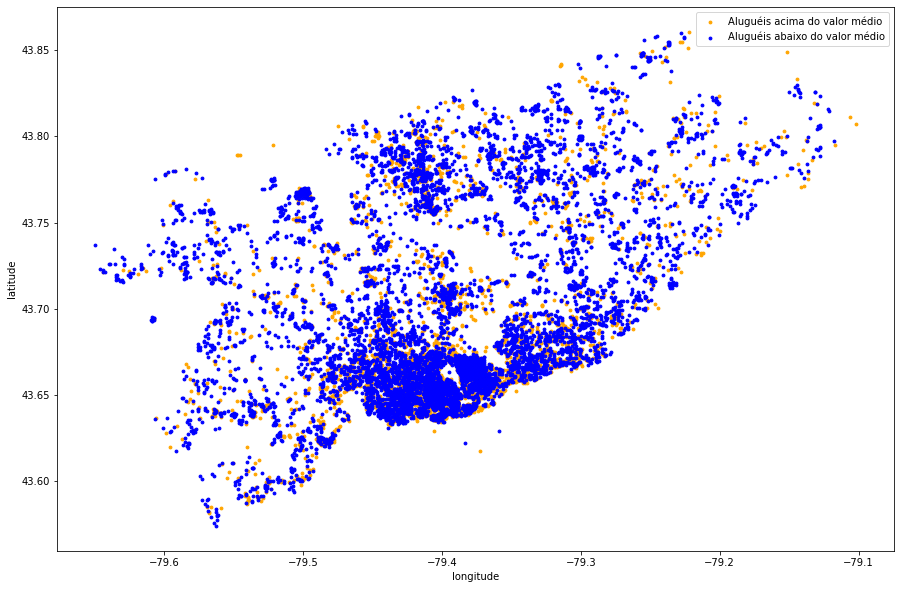

In [33]:
# plotar gráfico de dispersão (longitude vs latitude) dos imóveis acima e abaixo do valor médio
plt.subplots(figsize=(15,10))
plt.scatter(df_clean[df_clean.price >= media_price].longitude, 
            df_clean[df_clean.price >= media_price].latitude, 
            s=8, c='orange',label='Aluguéis acima do valor médio');
plt.scatter(df_clean[df_clean.price < media_price].longitude,
            df_clean[df_clean.price < media_price].latitude, 
            s=8, c='b',label='Aluguéis abaixo do valor médio')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend();

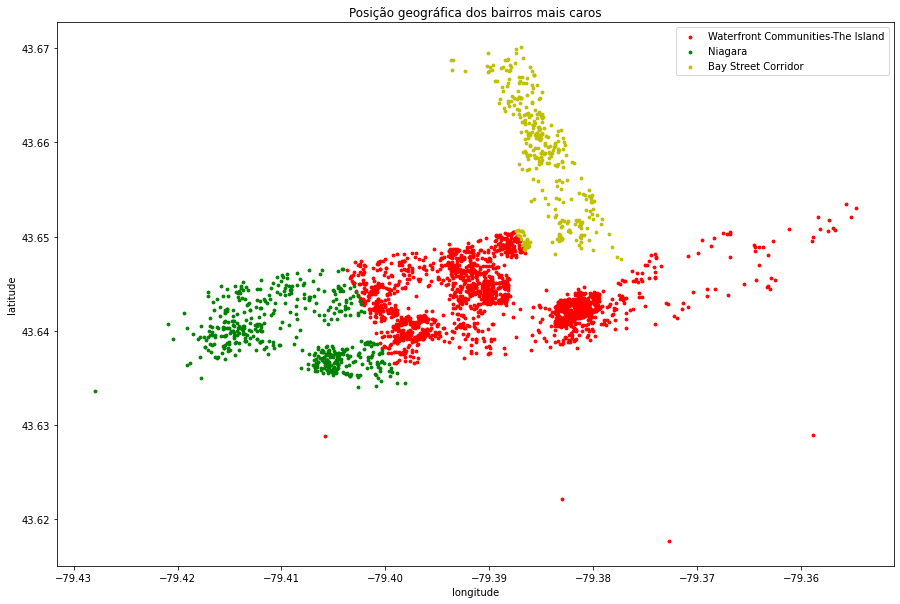

In [34]:
# Podemos fazer algo similar com as posições geográficas dos três bairros mais caros
df_clean.set_index('neighbourhood', inplace=True)

bairro_um = df_clean.loc['Waterfront Communities-The Island', ['latitude', 'longitude']]
bairro_dois = df_clean.loc['Niagara', ['latitude', 'longitude']]
bairro_tres = df_clean.loc['Bay Street Corridor', ['latitude', 'longitude']]

# transformando tudo isso em gráfico
plt.subplots(figsize=(15,10))
plt.scatter(bairro_um.longitude, bairro_um.latitude, s=8, c='r',label='Waterfront Communities-The Island')
plt.scatter(bairro_dois.longitude, bairro_dois.latitude, s=8, c='g',label='Niagara')
plt.scatter(bairro_tres.longitude, bairro_tres.latitude, s=8, c='y',label='Bay Street Corridor')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend();
plt.title('Posição geográfica dos bairros mais caros');

## Conclusão


Esta simples análise exploratória, ainda que trabalhosa – tendo em vista a necessidade de alterar e remover certos valores –, trouxe-nos informações importantes a respeito do uso do Airbnb em Toronto. 

Observamos que a cidade tem uma média de preços de aluguel razoável aos padrões de uma capital, com uma distribuição dos imóveis (no sentido geográfico) linear e positiva, embora fraca. Além disso, entre os bairros com valores mais altos, os três primeiros são *Waterfront Communities, Niagara e
Bay Street Corridor*.

Por parte dos hóspedes, há uma preferência de mais de 60% por espaços inteiros (casa ou apartamento), em detrimento da escolha por quartos compartilhados ou de hotel. Percebe-se também que as pessoas se hospedam por um período relativamente longo de tempo, com uma média mínima de noites igual a 21 dias, sendo que há bairros, como é o caso de *Kingsway South*, nos quais esta chega a 30.  

Enfim, a base de dados utilizada nessa análise é apenas uma versão reduzida, ideal para abordagens como essa feita aqui. Para um estudo mais rico e aprofundado, é recomendado que se use a versão completa, de 106 atributos.